In [83]:
import pandas as pd

In [84]:
df = pd.read_csv("train-2.csv")

In [85]:
df.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [86]:
# 1列目のage列〜4列までのeducation列までを範囲選択
X = df.loc[:, "Id" : "Soil_Type40"]

In [87]:
y = df.loc[:,"Cover_Type"]

In [88]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [89]:
# データの標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)                   # 与えられた行列の各特徴量について､平均と標準偏差を算出
X_std = scaler.fit_transform(X) 
#scaler.fit(y)
#y_std=scaler.fit_transform(y)

In [90]:
#ライブラリをインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [91]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_std, y, test_size=0.3, random_state=0)

In [92]:
from sklearn.tree import DecisionTreeClassifier
tree_1 = DecisionTreeClassifier(random_state=0, max_depth = 18)
tree_1.fit(X_1_train, y_1_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=18,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [93]:
# 精度の確認
print('train: {:.3f}'.format(tree_1.score(X_1_train, y_1_train)))
print('test : {:.3f}'.format(tree_1.score(X_1_test, y_1_test)))

train: 0.986
test : 0.776


In [104]:
# ランダムフォレストによる学習
from sklearn.ensemble import RandomForestClassifier
rfc_1 = RandomForestClassifier(random_state=0, n_estimators=10)
rfc_1.fit(X_1_train, y_1_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [106]:
#正答率を出力
print('train accuracy: %.3f' % rfc_1.score(X_1_train, y_1_train))
print('test  accuracy: %.3f' % rfc_1.score(X_1_test, y_1_test))

train accuracy: 0.995
test  accuracy: 0.825


In [107]:
from sklearn.ensemble import RandomForestClassifier
rfc_2 = RandomForestClassifier(random_state=0, n_estimators=100)
rfc_2.fit(X_1_train, y_1_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [108]:
# 特徴量の重要度を出力
importances = rfc_2.feature_importances_
importances

array([  7.67689535e-02,   2.03049586e-01,   4.46018810e-02,
         3.39853456e-02,   5.77635241e-02,   4.93297934e-02,
         8.33270044e-02,   5.12817188e-02,   4.14980175e-02,
         4.18323756e-02,   6.40089704e-02,   1.88214382e-02,
         4.00520801e-03,   1.46091252e-02,   4.47998942e-02,
         1.46269571e-03,   4.90403813e-03,   1.77466527e-02,
         1.20560414e-02,   1.17290292e-03,   2.76753278e-03,
         0.00000000e+00,   6.03627430e-06,   9.15922993e-05,
         2.18323836e-02,   3.05825857e-03,   3.74989838e-03,
         6.18970783e-03,   5.55535043e-04,   0.00000000e+00,
         1.01145417e-03,   5.09797941e-03,   7.35041600e-04,
         3.34733617e-04,   1.46534523e-03,   1.81469436e-04,
         4.01426227e-03,   5.18828571e-03,   2.47802446e-03,
         1.72112657e-05,   4.62003292e-04,   1.90132345e-04,
         1.23744268e-04,   5.04500776e-03,   6.83532368e-03,
         2.22760777e-03,   4.08488258e-03,   3.45492037e-03,
         2.29988083e-04,

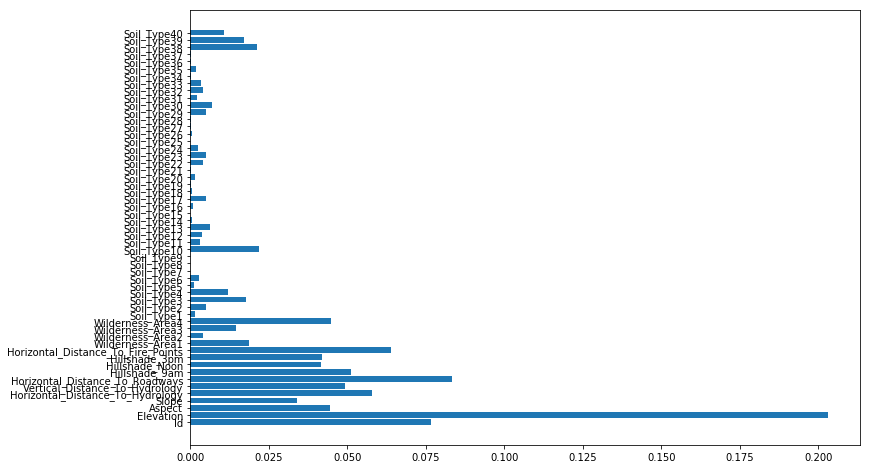

In [128]:
# 特徴量の重要度をグラフに出力
feature_names = X[:0]
n_features = 55
plt.figure(figsize=(12, 8))
plt.barh(range(n_features), rfc_2.feature_importances_ , align='center')
plt.yticks(np.arange(n_features),feature_names)
plt.show()

In [110]:
# 勾配ブースティング木で学習させる
from sklearn.ensemble import GradientBoostingClassifier
gbct = GradientBoostingClassifier(random_state=0, max_depth=3, learning_rate=0.1)
gbct.fit(X_1_train, y_1_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [111]:
# 正答率を出力
print('train accuracy: %.3f' % gbct.score(X_1_train, y_1_train))
print('test  accuracy: %.3f' % gbct.score(X_1_test, y_1_test))

train accuracy: 0.865
test  accuracy: 0.800


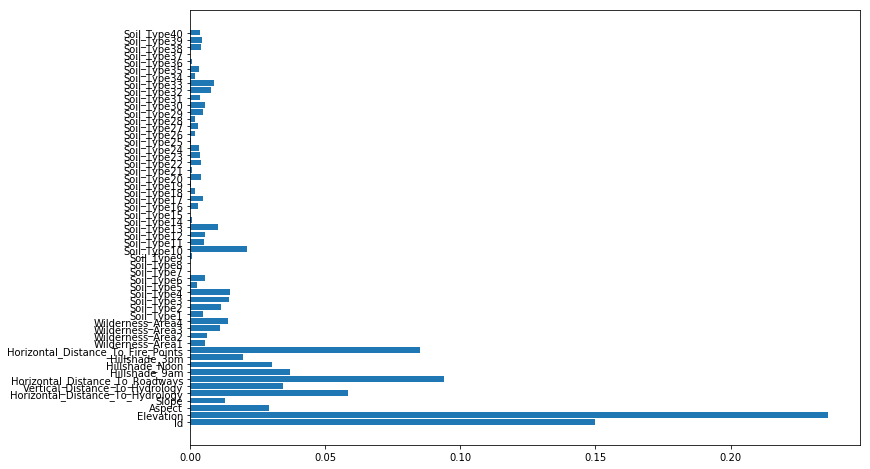

In [112]:
# 特徴量の重要度をグラフに出力
n_features = 55
plt.figure(figsize=(12, 8))
plt.barh(range(n_features), gbct.feature_importances_ , align='center')
plt.yticks(np.arange(n_features), feature_names)
plt.show()

#### 

In [114]:
df1 = pd.read_csv("test-2.csv")
X1 = df1.loc[:,"Id":"Soil_Type40"]
y1 = gbct.predict(X1)
y1